In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [30]:
from sklearn.datasets import load_iris
data = load_iris()


In [25]:
type(data)

sklearn.utils.Bunch

In [26]:
df = pd.DataFrame(data = data.data,
            columns = data.feature_names)
df['Target'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [27]:
import matplotlib.pyplot as plt

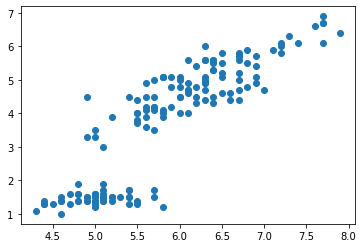

In [29]:
plt.scatter(df['sepal length (cm)'],df['petal length (cm)'])

In [36]:
from sklearn.cluster import KMeans

In [34]:
df_k = df
df_k.drop(columns = ['sepal width (cm)','petal width (cm)','Target'],inplace = True)

In [40]:
wcss = []
for i in range(1,21):
    Km = KMeans(n_clusters=i)
    Km.fit_predict(df_k)
    wcss.append(Km.inertia_)

In [41]:
wcss

[566.4937333333334,
 112.99207175925926,
 53.809978644106934,
 34.31702077922078,
 25.6394593755246,
 21.802626042191264,
 18.46039583223794,
 15.047554112554112,
 13.635304487179486,
 11.981197705802966,
 10.262970874507626,
 9.152513958616499,
 8.437955611992363,
 7.491593434343432,
 6.6151643079143065,
 6.226579725829725,
 5.646039862914863,
 5.3771303448013965,
 5.169729076479076,
 4.922529581529579]

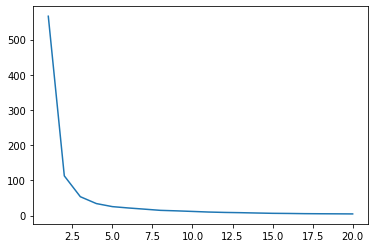

In [42]:
plt.plot(range(1,21),wcss)

In [43]:

Km = KMeans(n_clusters=4)
y_pred=Km.fit_predict(df_k)

In [44]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3,
       0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 1, 3, 1, 3, 1, 1, 0, 1, 1, 1,
       3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3], dtype=int32)

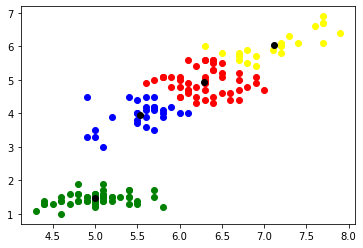

In [48]:
X = df_k.iloc[:].values

plt.scatter(X[y_pred == 0 , 0],X[y_pred == 0 , 1],color = 'blue')
plt.scatter(X[y_pred == 1 , 0],X[y_pred == 1 , 1],color = 'yellow')
plt.scatter(X[y_pred == 2 , 0],X[y_pred == 2 , 1],color = 'green')
plt.scatter(X[y_pred == 3 , 0],X[y_pred == 3 , 1],color = 'red')
plt.scatter(cen[:,0],cen[:,1],color = 'black')

In [47]:
cen = Km.cluster_centers_
cen

array([[5.53214286, 3.96071429],
       [7.12272727, 6.03181818],
       [5.006     , 1.462     ],
       [6.292     , 4.94      ]])